    调用所需要的包

In [1]:
import torch
import torchvision
from PIL import Image
from matplotlib import pyplot as plt
import os

In [2]:
#导入所需模型的类和函数

    调用训练好的分类模型

In [3]:
net = torch.load('./AI_model/model_.pt')

    定义作图函数

In [4]:
def get_labels(labels):
    text_labels = ['name1', 'name2', 'name3', 'name4']
    return [text_labels[int(i)] for i in labels]

def show_images(img_path, num_rows, num_cols, titles=None, scale=1.5):
    if num_cols>1:
        img_set = os.listdir(img_path)
        figsize = (num_cols * scale, num_rows * scale)
        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
        for i, file in enumerate(img_set):
            image_path = os.path.join(img_path, file)
            img = Image.open(image_path)
            plt.rcParams ['font.sans-serif']= ['Simhei']
            axes[i].imshow(img)
            axes[i].axis('off')
            if titles:
                axes[i].set_title(titles[i])
        plt.show()
    elif num_cols==1:
        img_set = os.listdir(img_path)
        figsize = (num_cols * scale, num_rows * scale)
        fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
        for i, file in enumerate(img_set):
            image_path = os.path.join(img_path, file)
            img = Image.open(image_path)
            plt.rcParams ['font.sans-serif']= ['Simhei']
            axes.imshow(img)
            axes.axis('off')
            if titles:
                axes.set_title(titles)
        plt.show()
    return axes

    定义图像转换形式

In [5]:
image_size = 512
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((image_size, image_size)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
input_shape = (3, image_size, image_size)
num_patches = 32

    根据实际需求修改的参数

In [6]:
batch_size = 4  #参数值为图片数量
test_path = './read'
img_path = './read/image/'

    处理读取的数据及定义预测函数

In [7]:
test_data = torchvision.datasets.ImageFolder(test_path,transform=transform)
test_iter=torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)

def predict(net, test_iter, n=batch_size): 
    for X, y in test_iter:
        break
    X = X.to('cuda')
    preds = get_labels(net(X).argmax(axis=1))
    if len(preds)>1:
        titles = [pred for pred in preds]
        show_images(img_path, 1, n, titles=titles[0:n])
    elif len(preds)==1:
        title = preds[0]
        show_images(img_path, 1, n, title)    

    输出结果

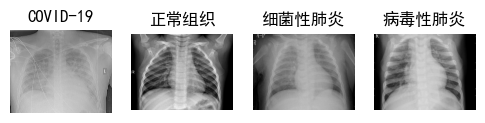

In [8]:
predict(net, test_iter)